<a href="https://www.javeriana.edu.co/inicio"><img src = "https://www.javeriana.edu.co/construye-futuro/wp-content/uploads/2021/02/javeriana-web-logo-edu.png" width = 600, align = "center"></a>

<h1>Regression Models with Neural Network</h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>

<a id="item31"></a>

## Download and Clean Dataset

Let's start by importing the <em>pandas</em> and the Numpy libraries.

In [196]:
#!pip3 install python-time
#!pip install keras
#!pip install tensorflow

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt

import tensorflow as tf
from keras import optimizers
from tensorflow.keras.optimizers import SGD

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense



import time


<h2 id="understanding_data">Understanding the Data</h2>

### `MY2022_Fuel_Consumption_Ratings.csv`:
We have downloaded a fuel consumption dataset, **`MY2022 Fuel Consumption Ratings.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2022
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. Compact
- **ENGINE SIZE** e.g. 2.4
- **CYLINDERS** e.g 4
- **TRANSMISSION** e.g. AM8
- **FUEL** e.g. Z

- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 7
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 8.6
- **CO2 EMISSIONS (g/km)** e.g. 200   --> 6
- **SMOG** e.g. 3

Let's download the data and read it into a <em>pandas</em> dataframe.

In [5]:
emissions_df = pd.read_csv("Fuel_Consumption_Ratings.csv", encoding='cp1252', index_col=False)
emissions_df.head()

,Model_year,Make,Model,Vehicle Class,Engine_Size,Cylinders,Transmission,Fuel,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions,CO2_Rating,Smog_Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5.0,7.0


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 

#### Let's check how many data points we have.

In [6]:
emissions_df.shape

(26082, 15)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [7]:
emissions_df.describe()

,Model_year,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions,CO2_Rating,Smog_Rating
count,26082.000000,26082.000000,26082.000000,26082.000000,26082.000000,26082.000000,26082.000000,26082.000000,7091.000000,5981.000000
mean,2009.548117,3.351422,5.840848,13.885496,10.030059,12.150633,24.859788,276.040143,4.672261,4.680154
std,7.696901,1.339966,1.797079,3.744483,2.596957,3.191725,6.694963,65.858372,1.638325,1.786007
min,1995.000000,0.800000,2.000000,4.000000,3.900000,4.000000,10.000000,94.000000,1.000000,1.000000
25%,2004.000000,2.300000,4.000000,11.300000,8.300000,10.000000,20.000000,230.000000,4.000000,3.000000
50%,2010.000000,3.000000,6.000000,13.400000,9.600000,11.700000,24.000000,269.000000,5.000000,5.000000
75%,2016.000000,4.200000,8.000000,16.000000,11.400000,13.900000,28.000000,315.000000,6.000000,6.000000
max,2022.000000,8.400000,16.000000,33.300000,22.100000,27.500000,71.000000,633.000000,10.000000,8.000000


In [8]:
emissions_df.isnull().sum()

Model_year                       0
Make                             0
Model                            0
Vehicle Class                    0
Engine_Size                      0
Cylinders                        0
Transmission                     0
Fuel                             0
Fuel_Consumption_City            0
Fuel_Consumption_Hwy             0
Fuel_Consumption_Comb            0
Fuel_Consumption_Comb_mpg        0
CO2_Emissions                    0
CO2_Rating                   18991
Smog_Rating                  20101
dtype: int64

The data looks very clean and is ready to be used to build our model.

#### Split data into predictors and target

The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.

In [9]:
predictors =  emissions_df[['Engine_Size','Cylinders','Fuel_Consumption_City','Fuel_Consumption_Hwy']]
target =  emissions_df['CO2_Emissions']

<a id="item2"></a>

Let's do a quick sanity check of the predictors and the target dataframes.

In [10]:
predictors.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy
0,2.4,4,9.9,7.0
1,3.5,6,12.6,9.4
2,2.0,4,11.0,8.6
3,2.0,4,11.3,9.1
4,2.0,4,11.2,8.0


In [11]:
target.head()

0    200
1    263
2    232
3    242
4    230
Name: CO2_Emissions, dtype: int64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [12]:
predictors_train,predictors_test,target_train,target_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [13]:
predictors_train = StandardScaler().fit_transform(predictors_train)
predictors_test = StandardScaler().fit_transform(predictors_test)

Let's save the number of predictors to *n_cols* since we will need this number when building our network.

In [14]:
n_cols = predictors_train.shape[1] # number of predictors

<a id="item1"></a>

<a id='item32'></a>

## Import Keras

Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.

<a id='item33'></a>

## Build a Neural Network

Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.

In [17]:
# define regression model
def regression_model(N,activation='relu',optimizer='adam',Neurons_hidden=1):
    # create model
    model = Sequential()
    model.add(Dense(N, activation=activation, input_shape=(n_cols,)))
    model.add(Dense(Neurons_hidden, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

The above function create a model that has two hidden layers, each of 50 hidden units.

<a id="item4"></a>

<a id='item34'></a>

## Train and Test the Network

Let's call the function now to create our model.

In [18]:
# build the model
model = regression_model(1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 5         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.

In [23]:
history = model.fit(predictors_train, target_train, epochs=5, verbose=False, validation_data=(predictors_test, target_test))

In [24]:
# Evaluate model
train_score = model.evaluate(predictors_train, target_train, verbose=False)
test_score = model.evaluate(predictors_test, target_test, verbose=False)

In [25]:
print("Validation [MSE,RMSE]:", test_score)
print("Training: [MSE,RMSE]", train_score)
print("--------------------")
print("First 5 samples validation:", history.history["val_loss"][0:5])
print("First 5 samples training:", history.history["loss"][0:5])

Validation [MSE,RMSE]: [58592.3984375, 242.0586700439453]
Training: [MSE,RMSE] [58354.2265625, 241.56619262695312]
--------------------
First 5 samples validation: [77805.4375, 74198.0, 69486.890625, 64130.578125, 58592.3984375]
First 5 samples training: [78812.65625, 75890.65625, 71697.1953125, 66622.3203125, 61137.14453125]


In [26]:
train_score[1]

241.56619262695312

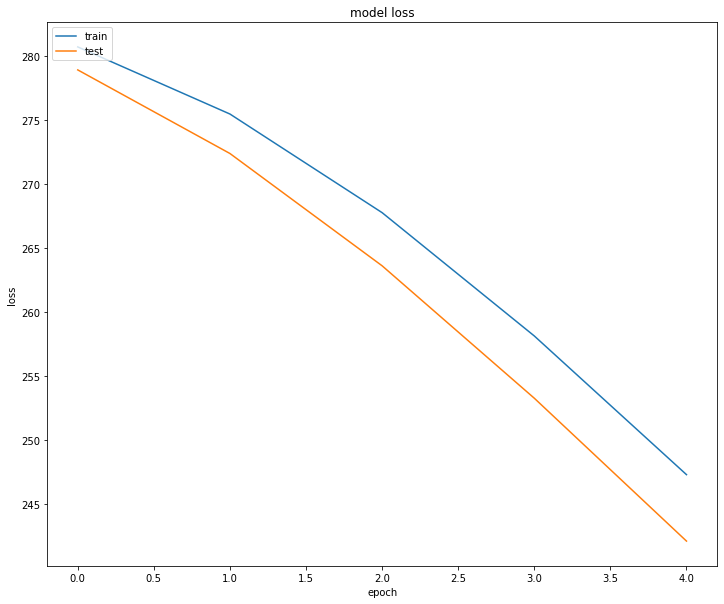

In [27]:
fig = plt.figure(figsize=(12, 10))

plt.subplot(111)  
plt.plot(history.history['root_mean_squared_error'])  
plt.plot(history.history['val_root_mean_squared_error'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

In [28]:
y_pred = model.predict(predictors_test, batch_size=None, verbose=False, steps=None, workers=1, use_multiprocessing=False)
print('RMSE: %.3f'% mean_absolute_error(target_test, y_pred))
print("R2-score: %.3f" % r2_score(target_test, y_pred))

RMSE: 239.393
R2-score: -12.273


In [29]:
y_pred = model.predict(predictors_train, batch_size=None, verbose=False, steps=None, workers=1, use_multiprocessing=False)
print('RMSE: %.3f'% mean_absolute_error(target_train, y_pred))
print("R2-score: %.3f" % r2_score(target_train, y_pred))

RMSE: 238.927
R2-score: -12.558


In [21]:
from timeit import default_timer as timer
import timeit

### Automatic test

In [25]:
num_neuronas = []
num_neuronas_1_hidden_layer = []
time = []
RMSE_train = []
RMSE_test = []
r2_train = []
r2_test = []

sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True, name='SGD')
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop")
Adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")
Adadelta = tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.85, epsilon=1e-06, name="Adadelta")
Adagrad = tf.keras.optimizers.Adagrad( learning_rate=0.2, initial_accumulator_value=0.1, epsilon=1e-07, name="Adagrad")
Adamax = tf.keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06, name="Adamax")
Nadam = tf.keras.optimizers.Nadam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
Ftrl = tf.keras.optimizers.Ftrl(learning_rate=0.2, learning_rate_power=-0.5, initial_accumulator_value=0.1,
                                l1_regularization_strength=0.0, l2_regularization_strength=0.0, name="Ftrl",
                                l2_shrinkage_regularization_strength=0.0, beta=0.0)

optimizers = [sgd,RMSprop,Adam,Adadelta,Adagrad,Adamax,Nadam,Ftrl]
#optimizers = [Adagrad,Adamax,Nadam,Ftrl]

for i in range(1,11):
    
    time_aux = []
    RMSE_train_aux = []
    RMSE_test_aux = []
    r2_train_aux = []
    r2_test_aux = []
    
    print('Processing with:', i, 'hidden neurons')
    
    for j in range(1,11):
        
        model = regression_model(3,activation='relu',optimizer='Adam', Neurons_hidden=i)
        start = timer()
        model.fit(predictors_train, target_train, epochs=50, verbose=False, validation_data=(predictors_test, target_test))
        elapsed_time = timer() - start
        
        train_score = model.evaluate(predictors_train, target_train, verbose=False)
        test_score = model.evaluate(predictors_test, target_test, verbose=False)
    
        y_pred_train = model.predict(predictors_train, batch_size=None, verbose=False, steps=None, workers=1, use_multiprocessing=False)
        y_pred_test = model.predict(predictors_test, batch_size=None, verbose=False, steps=None, workers=1, use_multiprocessing=False)
                
        time_aux.append(round(elapsed_time,3))
        RMSE_train_aux.append(round(train_score[1],3))
        RMSE_test_aux.append(round(test_score[1],3))
        r2_train_aux.append(round(r2_score(target_train, y_pred_train),3))
        r2_test_aux.append(round(r2_score(target_test, y_pred_test),3))
    
    #%timeit -n 1 -r 10 model.fit(predictors_train, target_train, epochs=5, verbose=False, validation_data=(predictors_test, target_test))
    
    num_neuronas_1_hidden_layer.append(i)
    time.append(np.mean(time_aux))
    RMSE_train.append(np.mean(RMSE_train_aux))
    RMSE_test.append(np.mean(RMSE_test_aux))
    r2_train.append(np.mean(r2_train_aux))
    r2_test.append(np.mean(r2_test_aux))
                

Processing with: 1 hidden neurons
Processing with: 2 hidden neurons
Processing with: 3 hidden neurons
Processing with: 4 hidden neurons
Processing with: 5 hidden neurons
Processing with: 6 hidden neurons
Processing with: 7 hidden neurons
Processing with: 8 hidden neurons
Processing with: 9 hidden neurons
Processing with: 10 hidden neurons


In [26]:
df = pd.DataFrame()
#df['optimizer'] = ['sgd','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl']
df['num_neuronas_1_hidden_layer'] = num_neuronas_1_hidden_layer
df['exec_time'] = time
df['RMSE_train'] = RMSE_train
df['RMSE_test'] = RMSE_test
df['r^2_train'] = r2_train
df['r^2_test'] = r2_test

print(df)

   num_neuronas_1_hidden_layer  exec_time  RMSE_train  RMSE_test  r^2_train  \
0                            1    42.9621     91.0932    91.6027    -3.6396   
1                            2    42.4910     68.0365    68.4568    -2.1305   
2                            3    44.8005     67.8768    68.3250    -2.1289   
3                            4    44.0754     20.6203    21.1188     0.9006   
4                            5    44.1761     20.6837    21.1655     0.9000   
5                            6    44.7689     20.9308    21.3958     0.8976   
6                            7    44.3292     20.1714    20.7286     0.9047   
7                            8    44.3832     19.8333    20.4231     0.9077   
8                            9    44.8798     19.5541    20.2325     0.9105   
9                           10    44.2934     18.5187    19.2758     0.9195   

   r^2_test  
0   -3.5416  
1   -2.0652  
2   -2.0638  
3    0.8984  
4    0.8981  
5    0.8957  
6    0.9021  
7    0.9047  
8   

In [27]:
df.to_csv('dataframes/hiden_neurons.csv', index=False)

## Analisis

### Variando solo neuronas de entrada 

### 1: 50 epoch, 5 iteracioones por cada modelo para promediar valores, optimizer='adam', variable neuronas de entrada


## GRAFICAS

In [158]:
n_neurons = pd.read_csv("dataframes/n_input_neurons.csv", encoding='cp1252', index_col=False)
n_neurons

,num_neuronas,exec_time,RMSE_train,RMSE_test,r^2_train,r^2_test
0,1,40.4264,115.6840,116.0432,-5.1634,-5.0308
1,2,42.2280,22.0894,22.4272,0.8866,0.8860
2,3,41.3264,19.2170,19.8754,0.9138,0.9098
3,4,42.7732,20.7476,21.2788,0.8994,0.8970
4,5,42.7664,19.2352,19.9266,0.9136,0.9100
5,6,42.1522,20.2296,20.8374,0.9042,0.9010
6,7,42.5180,21.0752,21.5790,0.8964,0.8942
7,8,42.9522,20.3916,20.8826,0.9028,0.9008
8,9,42.4742,18.8580,19.5556,0.9172,0.9134
9,10,43.5016,18.4948,19.2332,0.9204,0.9158


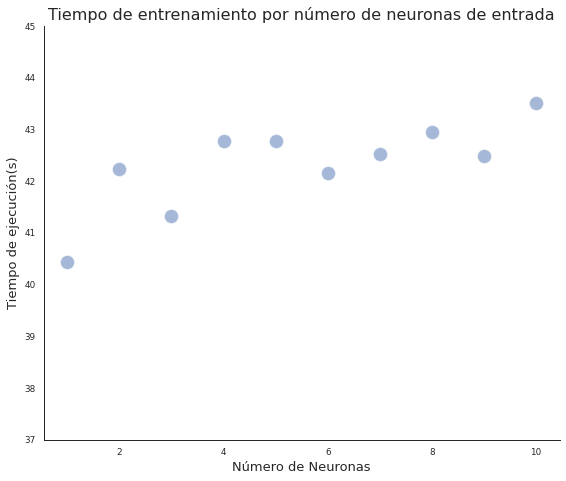

In [167]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas", y="exec_time", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons) \
    .set(title='Tiempo de entrenamiento por número de neuronas de entrada', xlabel='Número de Neuronas', ylabel='Tiempo de ejecución(s)',
        ylim=(37,45))
plt.gcf().set_size_inches(9, 7)

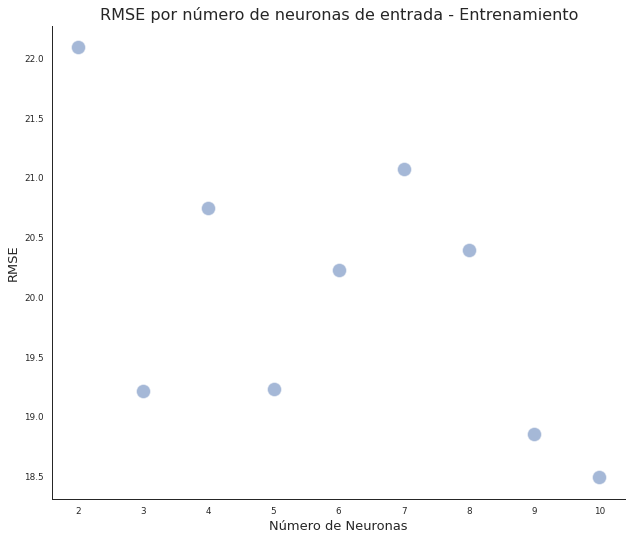

In [168]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas", y="RMSE_train", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons.iloc[1:]) \
    .set(title='RMSE por número de neuronas de entrada - Entrenamiento', xlabel='Número de Neuronas', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

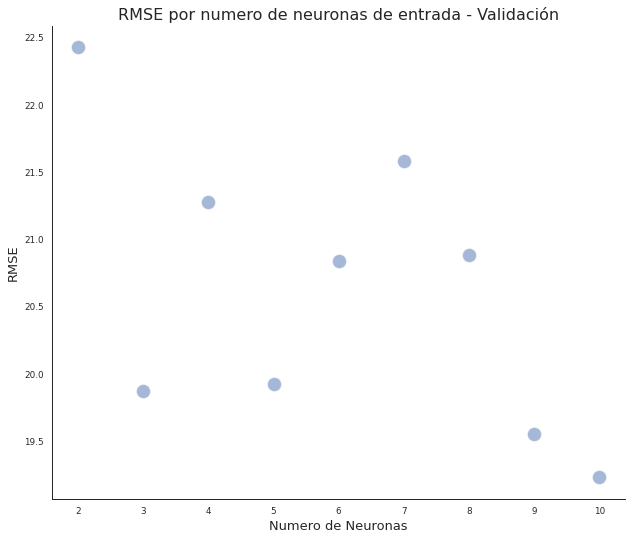

In [165]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas", y="RMSE_test", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons.iloc[1:]) \
    .set(title='RMSE por número de neuronas de entrada - Validación', xlabel='Número de Neuronas', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

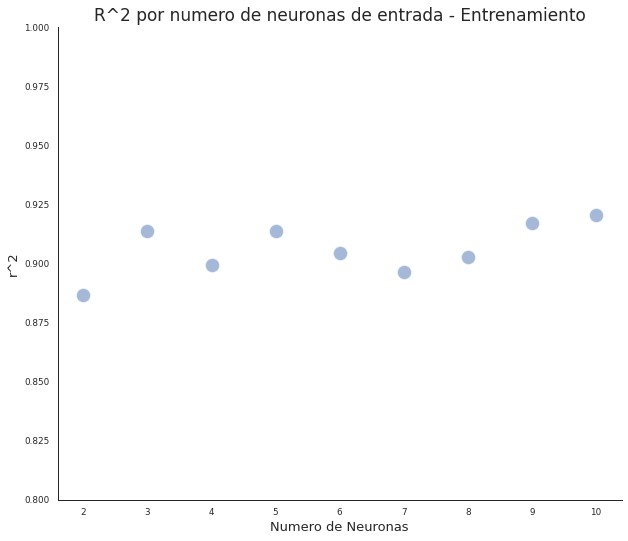

In [166]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":17,"axes.labelsize":13})   


sns.relplot(x="num_neuronas", y="r^2_train", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons.iloc[1:]) \
    .set(title='R^2 por numero de número de entrada - Entrenamiento', xlabel='Número de Neuronas', ylabel='r^2',
        ylim=(0.8,1))
plt.gcf().set_size_inches(10, 8)

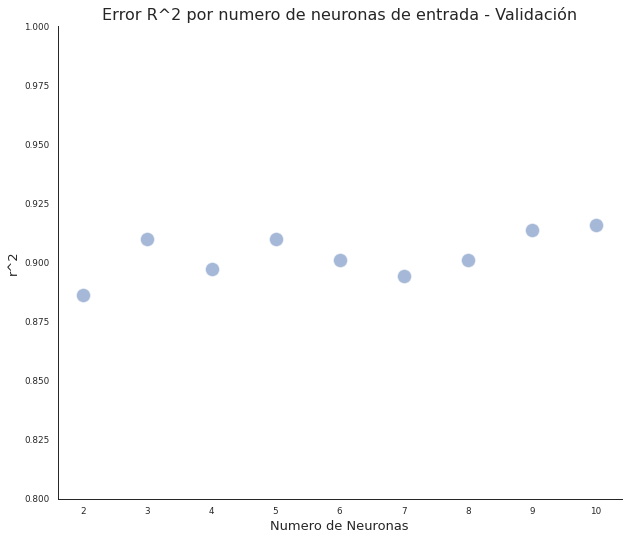

In [155]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas", y="r^2_test", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons.iloc[1:]) \
    .set(title='R^2 por numero de número de entrada - Validación', xlabel='Número de Neuronas', ylabel='r^2',
        ylim=(0.8,1))
plt.gcf().set_size_inches(10, 8)

### 1: 50 epoch, 5 iteracioones por cada modelo para promediar valores, neu_input = 3, variable optimizers


In [172]:
df_optimizer = pd.read_csv("dataframes/optimizer.csv", encoding='cp1252', index_col=False)
df_optimizer

,optimizer,exec_time,RMSE_train,RMSE_test,r^2_train,r^2_test
0,SGD,43.575,18.742,19.723,0.918,0.912
1,RMSprop,43.320,22.185,22.427,0.886,0.886
2,Adam,43.319,17.866,18.614,0.926,0.922
3,Adadelta,44.454,22.178,22.510,0.886,0.885
4,Adagrad,42.314,18.109,18.884,0.924,0.919
5,Adamax,43.287,17.850,18.675,0.926,0.921
6,Nadam,43.898,22.071,22.423,0.887,0.886
7,Ftrl,41.710,22.077,22.438,0.887,0.886


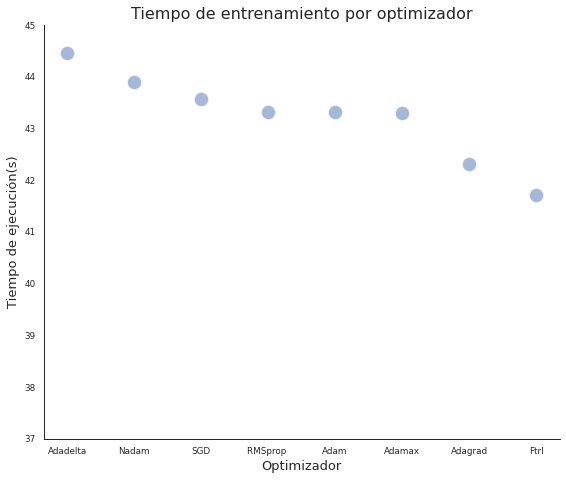

In [173]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="optimizer", y="exec_time", alpha=.5, palette="muted", s=200,
            height=6, data=df_optimizer.sort_values('exec_time',ascending=False)) \
    .set(title='Tiempo de entrenamiento por optimizador', xlabel='Optimizador', ylabel='Tiempo de ejecución(s)',
        ylim=(37,45))
plt.gcf().set_size_inches(9, 7)

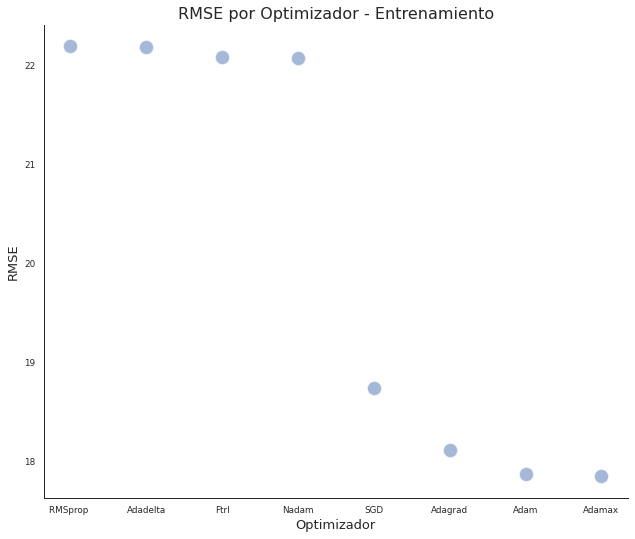

In [176]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="optimizer", y="RMSE_train", alpha=.5, palette="muted", s=200,
            height=6, data=df_optimizer.sort_values('RMSE_train',ascending=False)) \
    .set(title='RMSE por Optimizador - Entrenamiento', xlabel='Optimizador', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

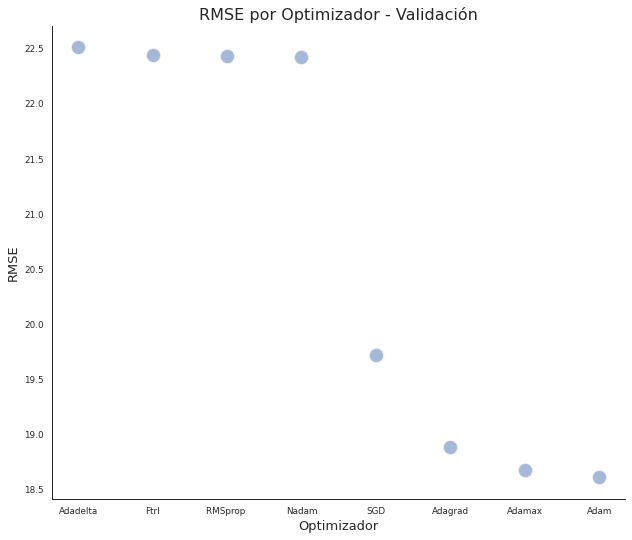

In [177]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="optimizer", y="RMSE_test", alpha=.5, palette="muted", s=200,
            height=6, data=df_optimizer.sort_values('RMSE_test',ascending=False)) \
    .set(title='RMSE por Optimizador - Validación', xlabel='Optimizador', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

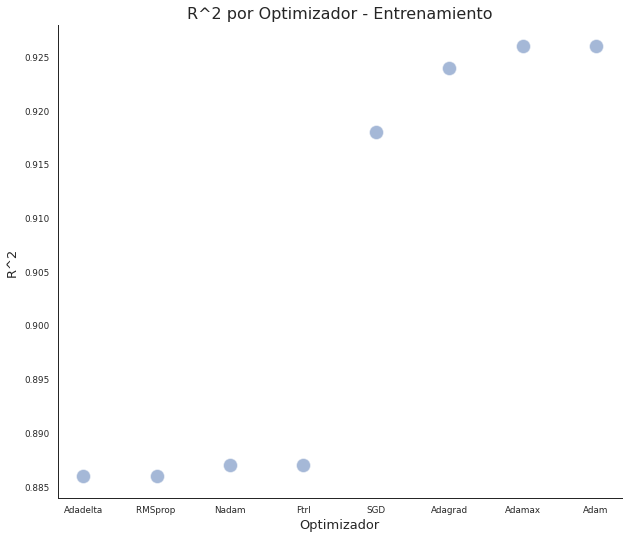

In [181]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="optimizer", y="r^2_train", alpha=.5, palette="muted", s=200,
            height=6, data=df_optimizer.sort_values('r^2_test',ascending=True)) \
    .set(title='R^2 por Optimizador - Validación', xlabel='Optimizador', ylabel='R^2 ')
plt.gcf().set_size_inches(10, 8)

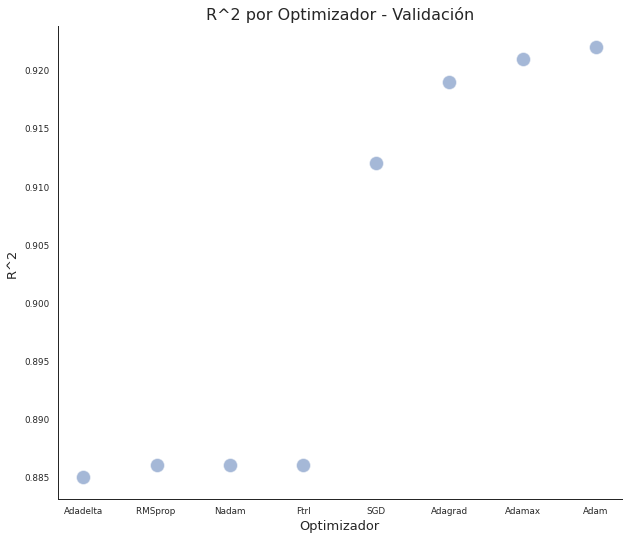

In [182]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="optimizer", y="r^2_test", alpha=.5, palette="muted", s=200,
            height=6, data=df_optimizer.sort_values('r^2_test',ascending=True)) \
    .set(title='R^2 por Optimizador - Validación', xlabel='Optimizador', ylabel='R^2 ')
plt.gcf().set_size_inches(10, 8)

In [28]:
n_neurons = pd.read_csv("dataframes/hiden_neurons.csv", encoding='cp1252', index_col=False)
n_neurons

,num_neuronas_1_hidden_layer,exec_time,RMSE_train,RMSE_test,r^2_train,r^2_test
0,1,42.9621,91.0932,91.6027,-3.6396,-3.5416
1,2,42.4910,68.0365,68.4568,-2.1305,-2.0652
2,3,44.8005,67.8768,68.3250,-2.1289,-2.0638
3,4,44.0754,20.6203,21.1188,0.9006,0.8984
4,5,44.1761,20.6837,21.1655,0.9000,0.8981
5,6,44.7689,20.9308,21.3958,0.8976,0.8957
6,7,44.3292,20.1714,20.7286,0.9047,0.9021
7,8,44.3832,19.8333,20.4231,0.9077,0.9047
8,9,44.8798,19.5541,20.2325,0.9105,0.9069
9,10,44.2934,18.5187,19.2758,0.9195,0.9153


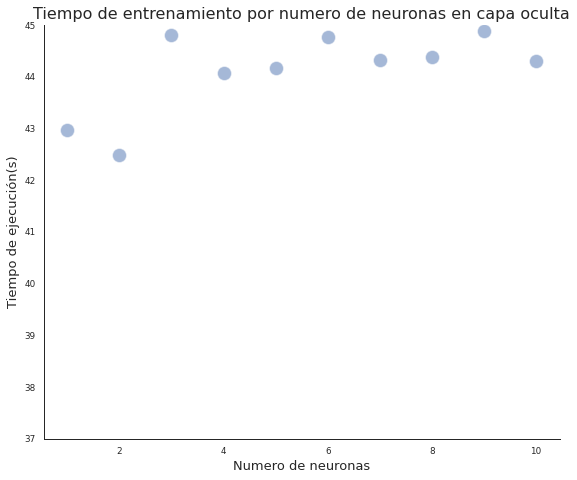

In [29]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas_1_hidden_layer", y="exec_time", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons.sort_values('exec_time',ascending=False)) \
    .set(title='Tiempo de entrenamiento por numero de neuronas en capa oculta', xlabel='Numero de neuronas', ylabel='Tiempo de ejecución(s)',
        ylim=(37,45))
plt.gcf().set_size_inches(9, 7)

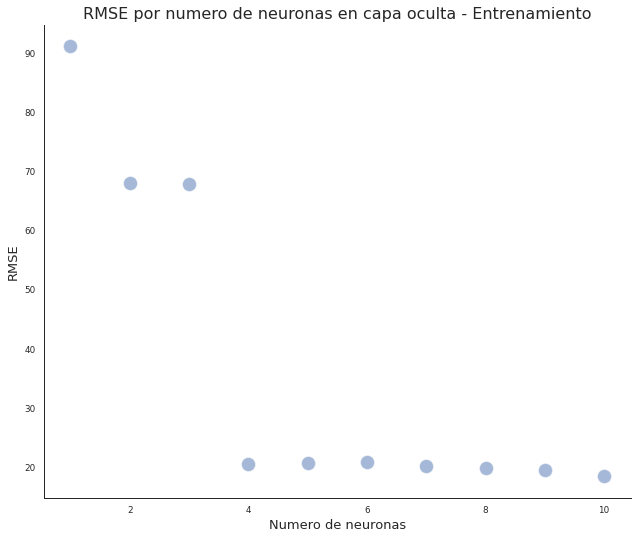

In [33]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas_1_hidden_layer", y="RMSE_train", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons.sort_values('RMSE_train',ascending=False)) \
    .set(title='RMSE por numero de neuronas en capa oculta - Entrenamiento', xlabel='Numero de neuronas', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

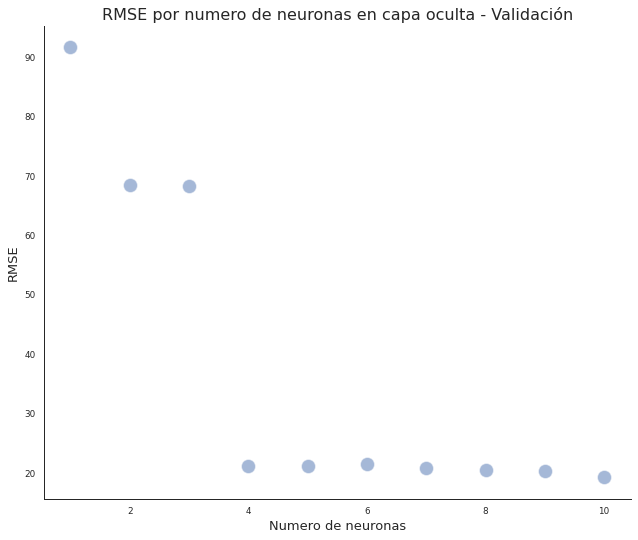

In [34]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas_1_hidden_layer", y="RMSE_test", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons.sort_values('RMSE_test',ascending=False)) \
    .set(title='RMSE por numero de neuronas en capa oculta - Validación', xlabel='Numero de neuronas', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

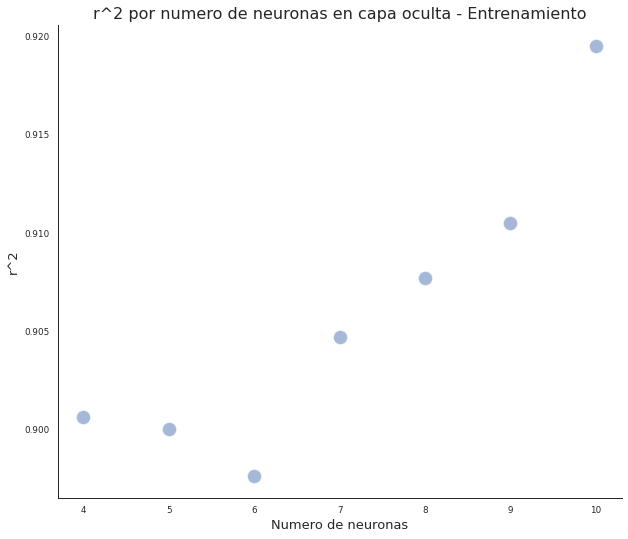

In [40]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas_1_hidden_layer", y="r^2_train", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons[3:].sort_values('r^2_train',ascending=False)) \
    .set(title='r^2 por numero de neuronas en capa oculta - Entrenamiento', xlabel='Numero de neuronas', ylabel='r^2')
plt.gcf().set_size_inches(10, 8)

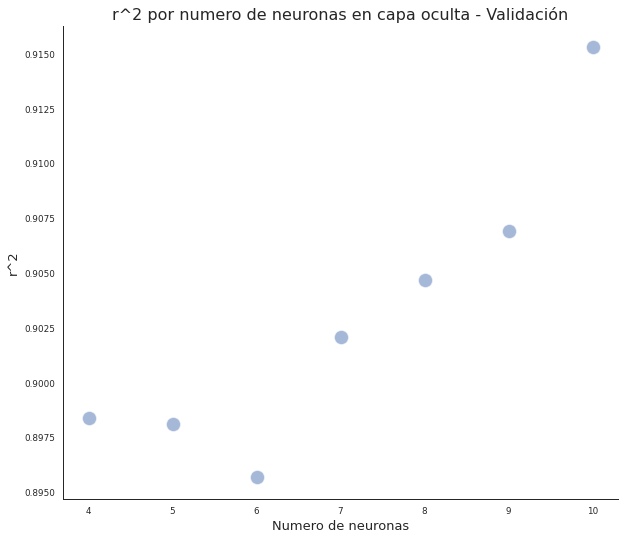

In [39]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="num_neuronas_1_hidden_layer", y="r^2_test", alpha=.5, palette="muted", s=200,
            height=6, data=n_neurons[3:].sort_values('r^2_test',ascending=False)) \
    .set(title='r^2 por numero de neuronas en capa oculta - Validación', xlabel='Numero de neuronas', ylabel='r^2')
plt.gcf().set_size_inches(10, 8)